# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em **milhares de reais**
- Vendas estão em **milhões**

#### Importar a Base de dados

In [80]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,12.00
3,151.50,41.30,58.50,16.50
4,180.80,10.80,58.40,17.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,14.00
197,177.00,9.30,6.40,14.80
198,283.60,42.00,66.20,25.50


In [81]:
print(tabela.info())

#Tabela está ok. Não necessita de tratamento.

# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

,TV,Radio,Jornal,Vendas
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Jornal,0.06,0.35,1.00,0.16
Vendas,0.90,0.35,0.16,1.00


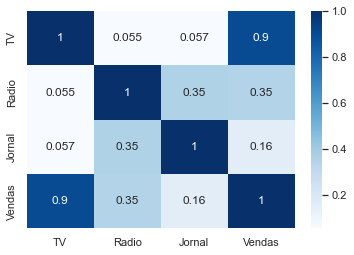

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

display(tabela.corr())

# criar o gráfico
sns.heatmap(tabela.corr(), cmap="Blues",annot=True)

# exibir o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [66]:
# y -> Quem você quer fazer a previsão de dados (Vendas)
# X -> Quem você vai utilizar para fazer a previsão (TV, Radio e Jornal)

x = tabela[["TV","Radio","Jornal"]]
y = tabela["Vendas"]

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3) # Ordem das variáveis importa

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Criação inteligência artificial
model_reglinear = LinearRegression()
model_randForest = RandomForestRegressor()
model_adaBoost = AdaBoostRegressor()
model_decisionTree = DecisionTreeRegressor()

# Treino inteligência artificial
model_reglinear.fit(x_treino, y_treino)
model_randForest.fit(x_treino, y_treino)
model_adaBoost.fit(x_treino, y_treino)
model_decisionTree.fit(x_treino, y_treino)

DecisionTreeRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [77]:
# Fazer previsão nos testes utilizando as duas inteligências artificais
# Comparar resultado das previsões com o resultado real dos testes, para saber qual IA funciona melhor

prev_reglinear = model_reglinear.predict(x_teste)
prev_randForest = model_randForest.predict(x_teste)
prev_adaBoost = model_adaBoost.predict(x_teste)
prev_decTree = model_decisionTree.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, prev_reglinear))
print(r2_score(y_teste, prev_randForest))
print(r2_score(y_teste, prev_adaBoost))
print(r2_score(y_teste, prev_decTree))

0.8769686197447044
0.9304136632094209
0.9126908928112125
0.8333329966323165


#### Visualização Gráfica das Previsões

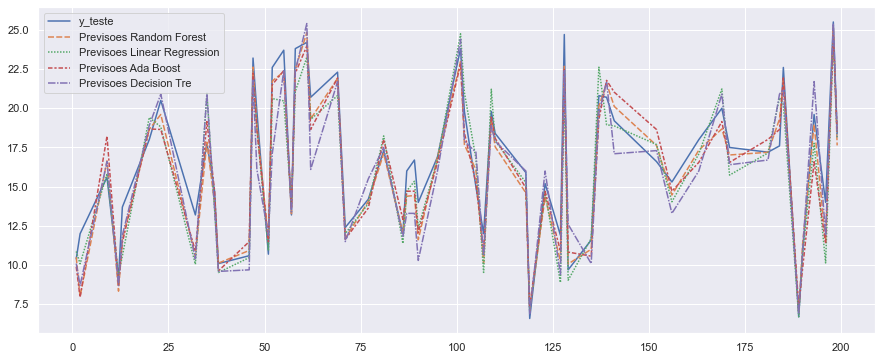

In [78]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes Random Forest"] = prev_randForest
tabela_auxiliar["Previsoes Linear Regression"] = prev_reglinear
tabela_auxiliar["Previsoes Ada Boost"] = prev_adaBoost
tabela_auxiliar["Previsoes Decision Tre"] = prev_decTree

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [79]:
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)

nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)
previsao = model_randForest.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.10,3.80,69.20
1,44.50,0.00,5.10
2,170.20,45.90,0.00


[ 7.13   8.369 20.005]
